In [103]:
import pandas as pd
import numpy as np
import matplotlib as mtp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [104]:
file_path="C:/Users/farha_5s5ygrk/housing.csv"

In [105]:
data=pd.read_csv(file_path)

In [106]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [107]:
data.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [108]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [110]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

# Missing Data Analysis

In [111]:
# Check for Missing data
missing_values=data.isnull().sum()

# percentage of missing data 
missing_percentage=(missing_values/len(data))*100

print("Missing values in each column", missing_values)
print("Missing percentage in each column", missing_percentage)

Missing values in each column longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Missing percentage in each column longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [112]:
#remove rows with missing values
data_cleaned=data.dropna()

#verify
print("Missing values in each column")
print(data_cleaned.isnull().sum())

Missing values in each column
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


# Data Exploration and Visualisation

In [113]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


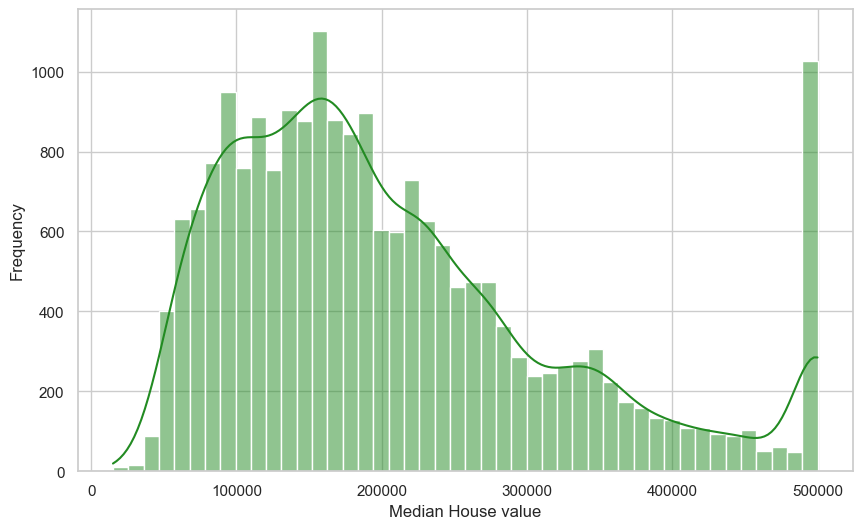

In [114]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  #initialising the white grid
sns.histplot(data_cleaned["median_house_value"], color="forestgreen", kde=True)   #plot a histogram in forestgre with the line(kde) as on
plt.xlabel("Median House value")
plt.ylabel("Frequency")
plt.show()    #show the figure

# Using Inter Quartile Range to Remove Outliers

In [115]:
Q1=data_cleaned["median_house_value"].quantile(0.25)
Q3=data_cleaned["median_house_value"].quantile(0.75)
IQR=Q3-Q1
print(Q1, Q3)

119500.0 264700.0


In [116]:
#define bounds for the outliers
lowerbound=Q1-IQR*1.5
upperbound=Q3+IQR*1.5

# Remove the outliers
data_no_outliers_1=data_cleaned[(data_cleaned["median_house_value"]>= lowerbound) & (data_cleaned["median_house_value"]<= upperbound)]

#check the shape of the data before and after
print("og shape:", data_cleaned.shape)
print("new shape:", data_no_outliers_1.shape)

og shape: (20433, 10)
new shape: (19369, 10)


# Boxplot for Outlier Detection

### Outliers in Median Income

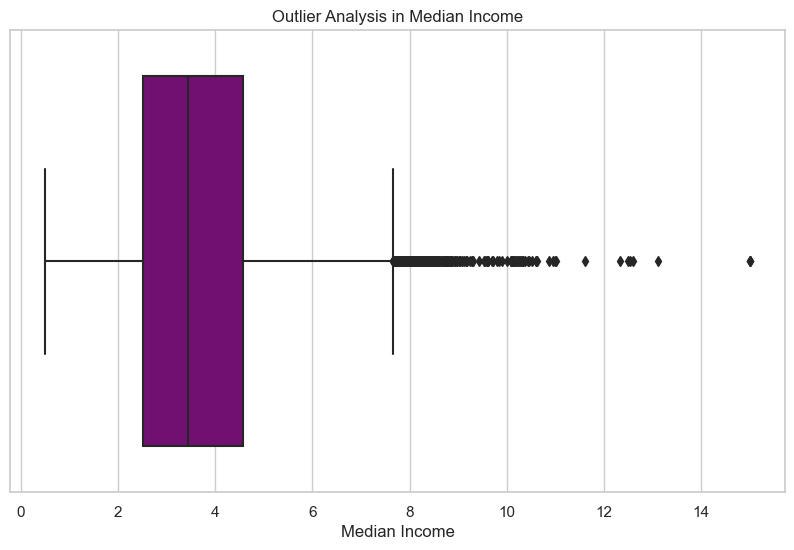

In [117]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers_1['median_income'], color='purple')
plt.title('Outlier Analysis in Median Income')
plt.xlabel('Median Income')
plt.show()

In [118]:
# Calculate Q1 and Q3
Q1 = data_no_outliers_1['median_income'].quantile(0.25)
Q3 = data_no_outliers_1['median_income'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1['median_income'] >= lower_bound) & (data_no_outliers_1['median_income'] <= upper_bound)]

# Check the shape of the data before and after the removal of outliers
print("Original data shape:", data_no_outliers_1.shape)
print("Data shape without outliers:", data_no_outliers_2.shape)

Original data shape: (19369, 10)
Data shape without outliers: (19026, 10)


In [119]:
data=data_no_outliers_2    #outliers in icome and value removed


# Correlation Heatmap

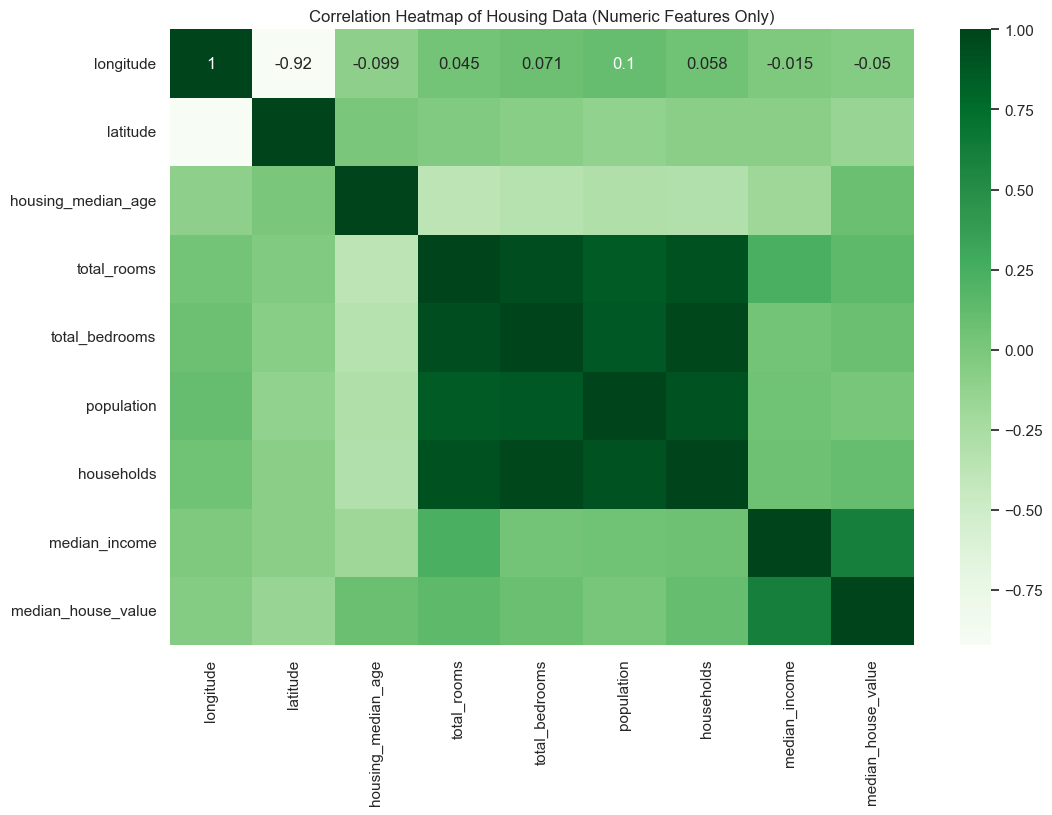

In [120]:
# Assuming 'data' is your DataFrame containing housing data
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Housing Data (Numeric Features Only)')
plt.show()

In [121]:
data = data.drop("total_bedrooms", axis = 1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [122]:
# Unique value count for categorical data
for column in ['ocean_proximity']:  # Add other categorical columns if any
    print(f"Unique values in {column}:", data[column].unique())

Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


# String Data Categorization to Dummy Variables

In [123]:
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity')
data = pd.concat([data.drop("ocean_proximity", axis =1), ocean_proximity_dummies], axis=1)
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
5,False,False,False,True,False
6,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [150]:
data

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,1,0
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,0,1,0,0
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,0,1,0,0
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,0,1,0,0
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,0,1,0,0


In [ ]:
data = data.drop("ocean_proximity_ISLAND", axis = 1)
data.columns

In [129]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,False,False,True,False
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,False,False,True,False
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,False,False,True,False
7,-122.25,37.84,52.0,3104.0,1157.0,647.0,3.1200,241400.0,False,False,True,False
8,-122.26,37.84,42.0,2555.0,1206.0,595.0,2.0804,226700.0,False,False,True,False
9,-122.25,37.84,52.0,3549.0,1551.0,714.0,3.6912,261100.0,False,False,True,False
10,-122.26,37.85,52.0,2202.0,910.0,402.0,3.2031,281500.0,False,False,True,False
11,-122.26,37.85,52.0,3503.0,1504.0,734.0,3.2705,241800.0,False,False,True,False


# Splitting data into train and Test

In [92]:
# Define your features (independent variables) and target (dependent variable)
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target = ["median_house_value"]

X = data[features]
y = data[target]


# Split the data into a training set and a testing set
# test_size specifies the proportion of the data to be included in the test split
# random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 15220 samples
Test set size: 3806 samples


# Training

In [166]:
# List of columns to change data type
columns_to_convert = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                      'population', 'households', 'median_income', 'median_house_value']

# Convert specified columns to float
data[columns_to_convert] = data[columns_to_convert].astype(float)

# Alternatively, if you want to convert them to integer, use:
# data[columns_to_convert] = data[columns_to_convert].astype(int)
data.index = data.index.astype(int)  # Convert index to integer data type



In [171]:
data.reset_index(drop=True, inplace=True)

data.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [153]:
# Convert boolean values to integers (0 or 1)
data[['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']] = data[['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']].astype(float)
print(data.dtypes)

longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity_<1H OCEAN     float64
ocean_proximity_INLAND        float64
ocean_proximity_NEAR BAY      float64
ocean_proximity_NEAR OCEAN    float64
dtype: object


In [172]:
# Reset index and convert it to integer
data.reset_index(drop=True, inplace=True)

# Check if the index is numeric and then convert it to integer
if data.index.is_numeric():
    data.index = data.index.astype(int)x
else:
    print("Index contains non-numeric values.")


C:\Users\farha_5s5ygrk\AppData\Local\Temp\ipykernel_22816\346715149.py:5: FutureWarning: RangeIndex.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if data.index.is_numeric():


In [174]:
# Check if the index is numeric
if data.index.is_numeric():
    print("Index contains numeric values.")
else:
    print("Index does not contain numeric values.")


Index contains numeric values.


C:\Users\farha_5s5ygrk\AppData\Local\Temp\ipykernel_22816\151926591.py:2: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if data.index.is_numeric():


In [179]:
# Adding a constant to the predictors because statsmodels' OLS doesn't include it by default
X_train_const = sm.add_constant(X_train)
X_train_const
X_train_const = X_train_const.astype(int)
X_train_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,1,-116,33,11,3213,1975,579,3,1,0,0,0
1656,1,-121,37,13,2085,852,264,7,0,1,0,0
9190,1,-118,34,52,102,54,32,1,1,0,0,0
11839,1,-120,39,26,2023,922,365,2,0,1,0,0
12267,1,-116,33,13,10886,4266,1955,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15355,1,-117,33,7,8206,4399,1423,3,1,0,0,0
9608,1,-120,37,20,4927,4205,1009,1,0,1,0,0
12606,1,-121,38,32,2364,1331,449,3,0,1,0,0
2907,1,-119,35,52,1503,554,277,1,0,1,0,0


In [180]:
# Fit the OLS model
model_fitted = sm.OLS(y_train, X_train_const).fit()

# Printing Summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     1771.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:57:32   Log-Likelihood:            -1.8926e+05
No. Observations:               15220   AIC:                         3.785e+05
Df Residuals:                   15208   BIC:                         3.786e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Prediction / testing

In [181]:
# Adding a constant to the test predictors
X_test_const = sm.add_constant(X_test)

# Making predictions on the test set
test_predictions = model_fitted.predict(X_test_const)
test_predictions

7322     173399.264037
465      254417.902675
12768     92662.614274
2617     228775.887392
13351    189346.306065
             ...      
11691    191407.229363
1454     215871.640385
7360        150945.539
19118    250058.355498
13084    225535.723209
Length: 3806, dtype: object

In [182]:
X_test_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7322,1.0,-118.17,33.98,27.0,1871.0,2542.0,581.0,2.8427,True,False,False,False
465,1.0,-122.28,37.86,52.0,938.0,393.0,189.0,3.8594,False,False,True,False
12768,1.0,-121.43,38.61,40.0,1134.0,675.0,249.0,1.3696,False,True,False,False
2617,1.0,-124.11,40.93,25.0,2392.0,1298.0,461.0,3.5076,False,False,False,True
13351,1.0,-117.62,34.02,9.0,4265.0,2280.0,589.0,5.5632,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
11691,1.0,-117.99,33.87,17.0,2334.0,1662.0,535.0,3.0147,True,False,False,False
1454,1.0,-121.96,37.96,28.0,1838.0,899.0,270.0,5.2145,False,True,False,False
7360,1.0,-118.19,33.96,28.0,3507.0,3740.0,970.0,2.0162,True,False,False,False
19118,1.0,-122.65,38.23,52.0,1923.0,910.0,345.0,3.4500,True,False,False,False


# Checking OLS Assumptions


### Linearity

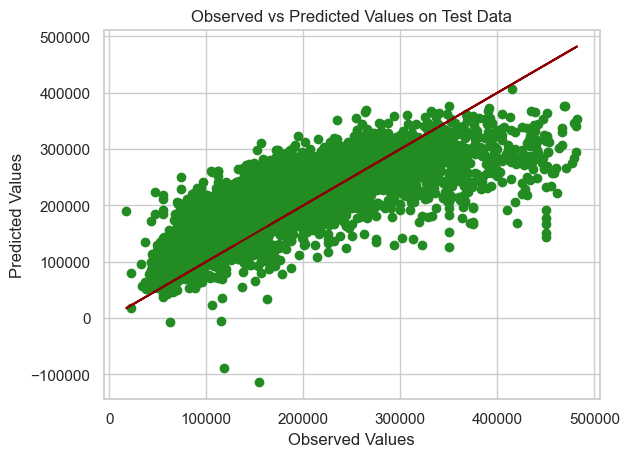

In [184]:
# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color = "forestgreen")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred')  # line for perfect prediction (true values)
plt.show()

### Random Sample

In [186]:
# Calculate the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residuals is {np.round(mean_residuals,2)}")


The mean of the residuals is 0.0


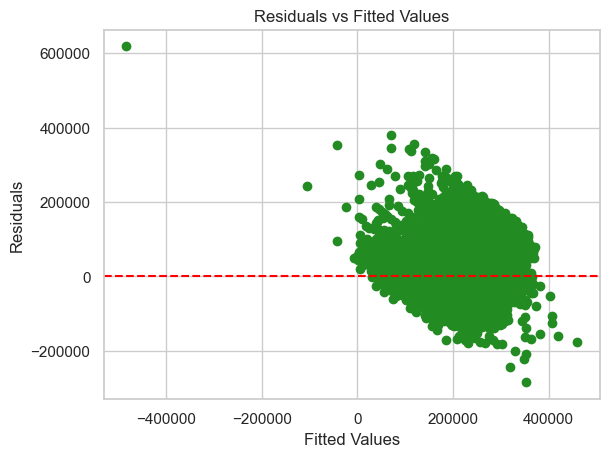

In [187]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


### Exogenity

In [188]:
# Calculate the residuals
residuals = model_fitted.resid

# Check for correlation between residuals and each predictor
for column in X_train.columns:
    corr_coefficient = np.corrcoef(X_train[column], residuals)[0, 1]
    print(f'Correlation between residuals and {column}: {np.round(corr_coefficient,2)}')

Correlation between residuals and longitude: -0.01
Correlation between residuals and latitude: -0.02
Correlation between residuals and housing_median_age: -0.0
Correlation between residuals and total_rooms: 0.0
Correlation between residuals and population: 0.0
Correlation between residuals and households: 0.0
Correlation between residuals and median_income: 0.04
Correlation between residuals and ocean_proximity_<1H OCEAN: -0.0
Correlation between residuals and ocean_proximity_INLAND: 0.0
Correlation between residuals and ocean_proximity_NEAR BAY: -0.0
Correlation between residuals and ocean_proximity_NEAR OCEAN: -0.0


# Train/Test/Evaluate using Sklearn

In [190]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(f'RMSE on Test Set: {rmse}')

RMSE on Test Set: 59405.888694416746


In [192]:
print(y_pred)
y_test

[[153414.2018804 ]
 [239312.04418031]
 [ 70054.78117497]
 ...
 [129935.7653883 ]
 [232846.31280863]
 [207120.21348536]]


,median_house_value
7322,164400.0
465,196400.0
12768,65200.0
2617,73600.0
13351,195100.0
...,...
11691,217000.0
1454,229200.0
7360,142000.0
19118,200600.0
